# Access Generated Dataset

The following notebook provides an example for how to access data from an existing dataset.

## If need to generate plots

If you want to generate plots from the dataset, you will need to import the lidar and radar data processors and configure them with the same parameters used to generate the dataset
### Initialization

In [2]:
#import modules
import os
import numpy as np
import pandas as pd
from Radar_Data_Processor import RadarDataProcessor
from Lidar_Data_Processor import LidarDataProcessor
#specify the path to the dataset

#location of the Deepsense6G dataset we wish to process - for this example, we don't care
scenario_folder = "/data/DeepSense6G/stationary_scenarios/scenario31"

#location that the dataset is saved to
dataset_folder = "/data/DeepSense6G/stationary_scenarios/scenario31/generated_dataset"

#fetch the dataset information
try:
    csv_file = [f for f in os.listdir(scenario_folder) if f.endswith('csv')][0]
    csv_path = os.path.join(scenario_folder, csv_file)
except:
    raise Exception(f'No csv file inside {scenario_folder}.')

dataframe = pd.read_csv(csv_path)
print(f'Columns: {dataframe.columns.values}')
print(f'Number of Rows: {dataframe.shape[0]}')

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Columns: ['index' 'unit1_rgb' 'unit1_pwr_60ghz' 'unit1_lidar' 'unit1_radar'
 'unit1_loc' 'unit2_loc' 'unit1_beam' 'unit1_max_pwr' 'time_stamp'
 'seq_index' 'unit2_spd_over_grnd_kmph' 'unit2_num_sats' 'unit2_altitude'
 'unit2_geo_sep' 'unit2_mode_fix_type' 'unit2_pdop' 'unit2_hdop'
 'unit2_vdop' 'unit2_interpolated_position']
Number of Rows: 7012


In [3]:
#configure the radar and lidar data processors
radar_data_processor = RadarDataProcessor()
radar_data_processor.configure(
    scenario_data_path=scenario_folder,
    radar_rel_paths=dataframe["unit1_radar"].values,
    save_file_folder= os.path.join(dataset_folder,"radar/"),
    save_file_name="radar_frame",
    max_range_bin=128,
    num_chirps_to_save=40,
    num_angle_bins=64,
    power_range_dB=[-40,-10],
    chirps_per_frame = 250,
    rx_channels = 4,
    tx_channels = 1,
    samples_per_chirp = 256,
    adc_sample_rate_Hz = 6200e3,
    chirp_slope_MHz_us= 8.014,
    start_freq_Hz=77e9,
    idle_time_us = 2,
    ramp_end_time_us = 47.5
)

lidar_data_processor = LidarDataProcessor()
lidar_data_processor.configure(
    scenario_data_path=scenario_folder,
    relative_paths=dataframe['unit1_lidar'].values,
    save_file_folder= os.path.join(dataset_folder,"lidar/"),
    save_file_name="lidar_frame",
    max_range_m=57.98,
    num_range_bins=256,
    angle_range_rad=[0,np.pi],
    num_angle_bins=512
)

max range: 57.983317931120546m


### Loading Data from the files
The data is saved in spherical coordinates

In [4]:
sample_idx = 1

#load radar data
radar_range_azimuth_response = radar_data_processor.load_range_az_spherical_from_file(sample_idx)

#load lidar data
lidar_spherical_pointcloud = lidar_data_processor.load_grid_from_file(sample_idx)

### Generating Plots
The following code can be used to generate plots from the data

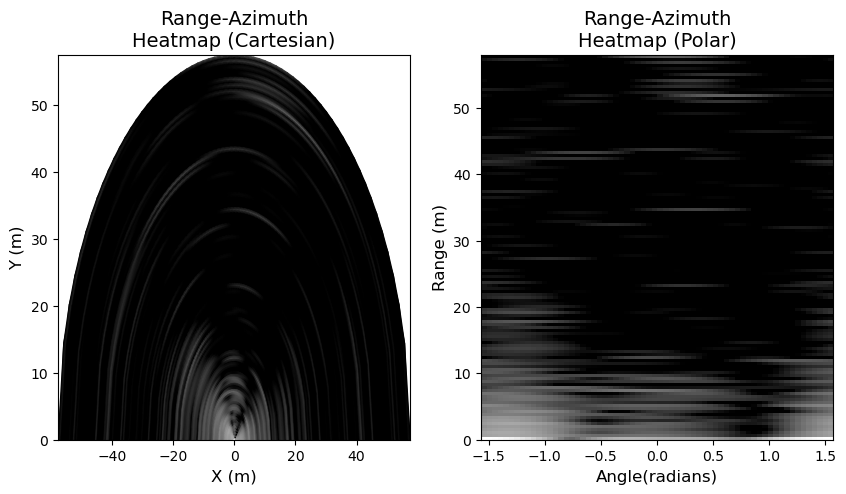

In [5]:
sample_idx = 1

#plot radar data
radar_data_processor.plot_from_saved_range_azimuth_response(sample_idx)

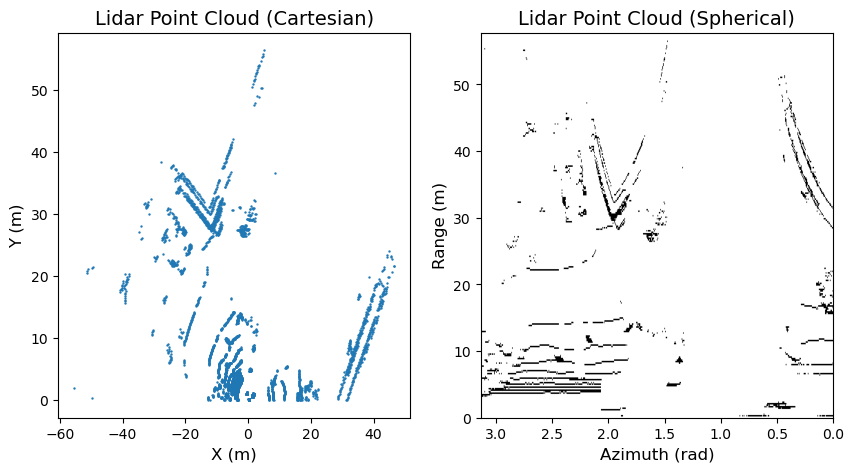

In [6]:
#plot lidar data
lidar_data_processor.plot_from_saved_grid(sample_idx)

## For just obtaining the data
If you just need the data, you can use the following code to load the processed data

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

#location that the dataset is saved to
dataset_folder = "/data/DeepSense6G/stationary_scenarios/scenario31/generated_dataset"
radar_file_name = "radar_frame"
lidar_file_name = "lidar_frame"

In [5]:
sample_idx = 1

#load the radar data
radar_file_path = os.path.join(dataset_folder,"radar","{}_{}.npy".format(radar_file_name,sample_idx))

radar_data = np.load(radar_file_path)

#load the lidar data
lidar_file_path = os.path.join(dataset_folder,"lidar","{}_{}.npy".format(lidar_file_name,sample_idx))
lidar_data = np.load(lidar_file_path)

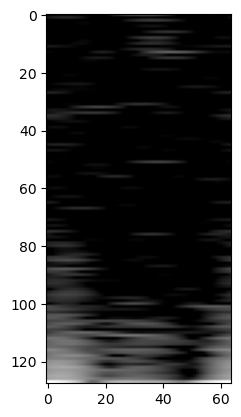

In [12]:
#visualize the radar data
fig,ax = plt.subplots()
ax.imshow(np.flip(radar_data[:,:,0]),cmap='gray') #show only the first chirp

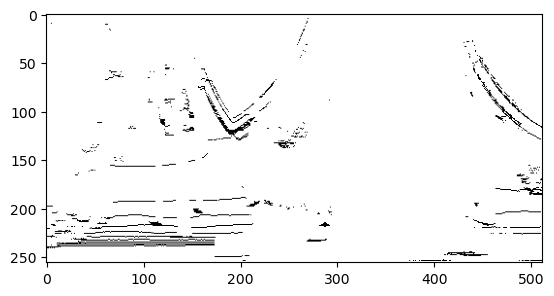

In [8]:
#visualize the lidar data
fig,ax = plt.subplots()
ax.imshow(lidar_data,cmap='binary')